In [5]:
# Importing Data processing libraries
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

# Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [12]:
data = pd.read_csv('bank_churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
data[['Geography','Gender']] = data[['Geography','Gender']].astype('category')
data['CustomerId'] = data['CustomerId'].astype('object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  object  
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(8), object(2)
memory usage: 957.4+ KB


In [17]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# EDA

In [18]:
data.shape

(10000, 14)

In [19]:
data.drop(columns=['RowNumber'], inplace=True)

In [20]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='Exited', ylabel='count'>

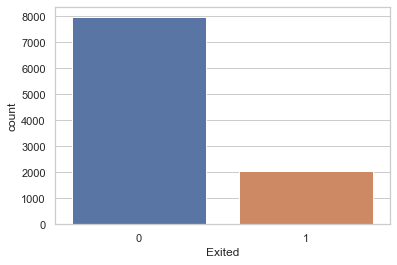

In [21]:
sns.countplot(x=data['Exited'])


Dari proporsi jumlah target variavel diatas kita bisa melihat bahwa pada dataset terdapat imbalance data. variabel exited dengan nilai 1 memiliki jumlah sekitar 200 sample atau 20% dari datasetnya sedangkan dengan nilai 0 memiliki jumlah 800 sample atau sebesar 80% dari datasetnya. 

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

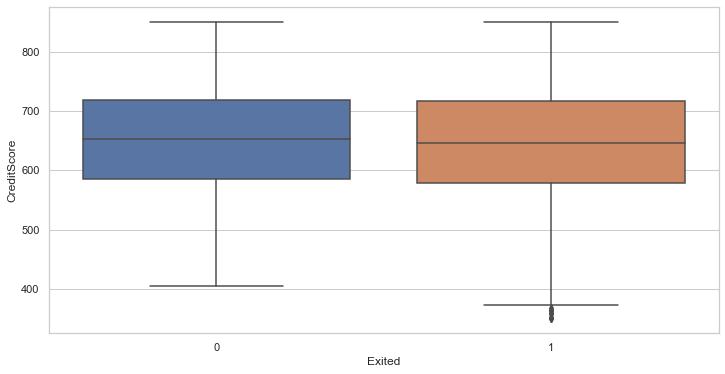

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Exited', y='CreditScore',data=data)

credit score antara variabel yang memiliki nilai 1 maupun 0 tidak jauh berbeda untuk persebarannya.


<AxesSubplot:xlabel='Exited', ylabel='Age'>

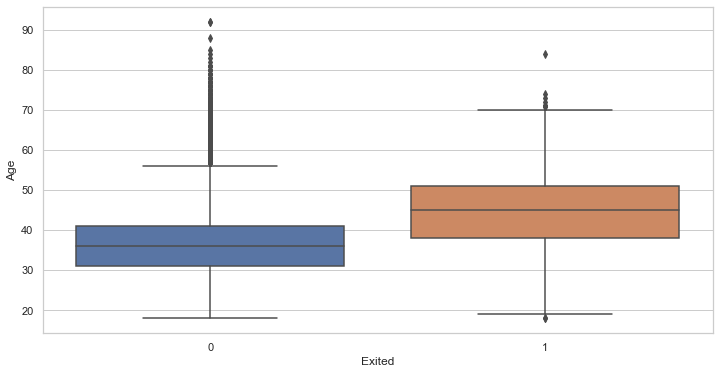

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Exited', y='Age',data=data)

variabel target yang memiliki nilai 1 memiliki persebaran usia diantara 37 tahun sampai 50 tahun.

<AxesSubplot:xlabel='Tenure', ylabel='count'>

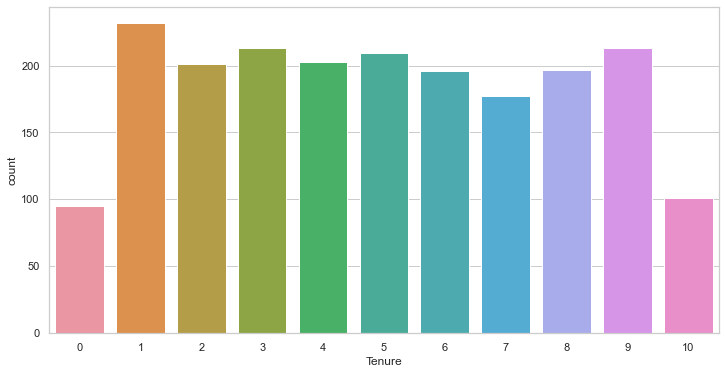

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='Tenure',data=data1)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

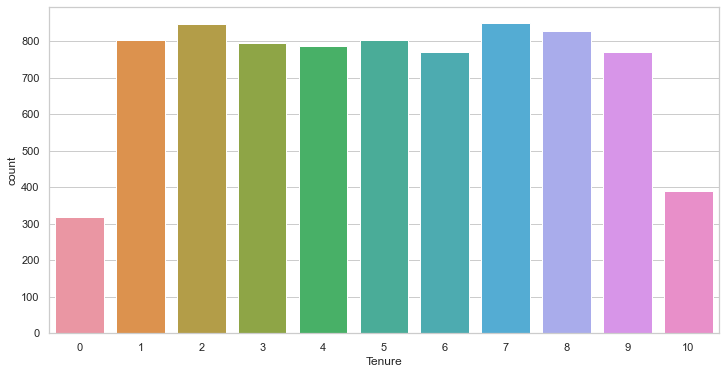

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='Tenure',data=data2)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

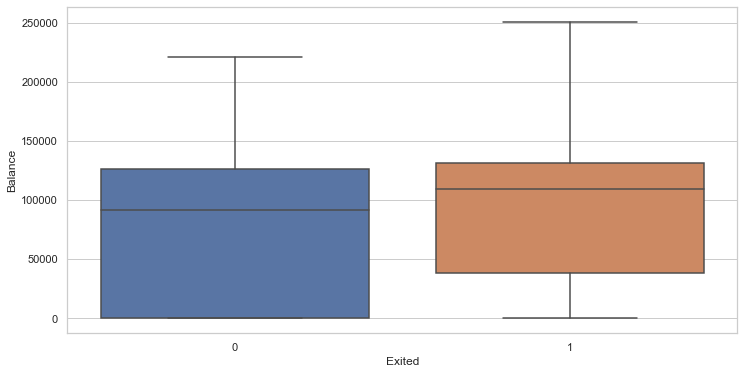

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Exited', y='Balance',data=data)

nilai balance untuk variabel exited yang memiliki nilai 1 memiliki rata-rata yang lebih tinggi di banding variabel exited yang memiliki nilai 0

In [51]:
data1=data[data['Exited']==1]
data2 = data[data['Exited']==0]

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

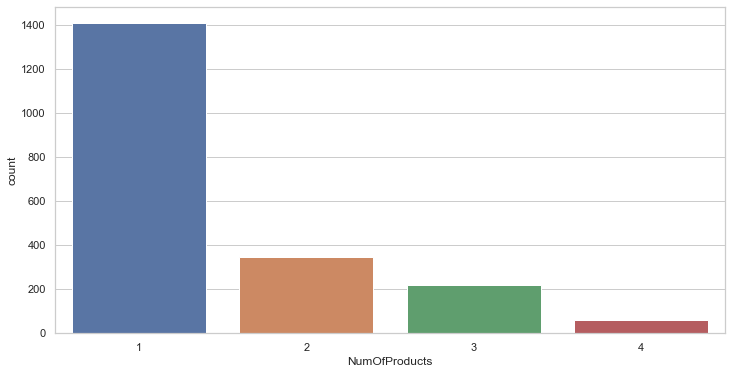

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x='NumOfProducts',data=data1)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

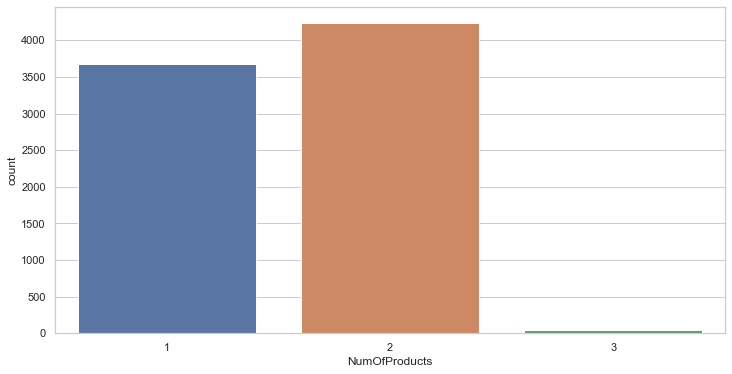

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='NumOfProducts',data=data2)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

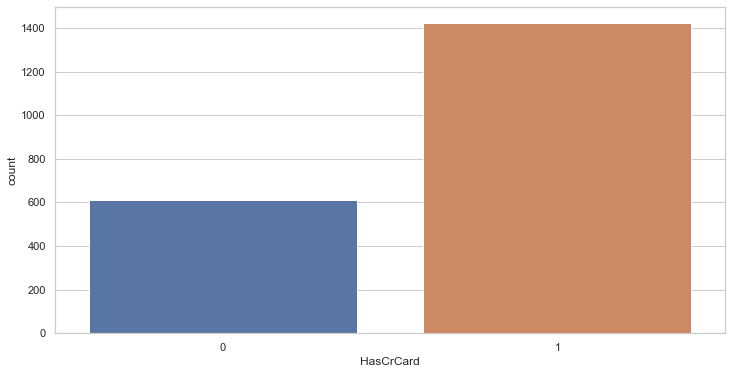

In [48]:
#HasCrCard	IsActiveMember
plt.figure(figsize=(12,6))
sns.countplot(x='HasCrCard',data=data1)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

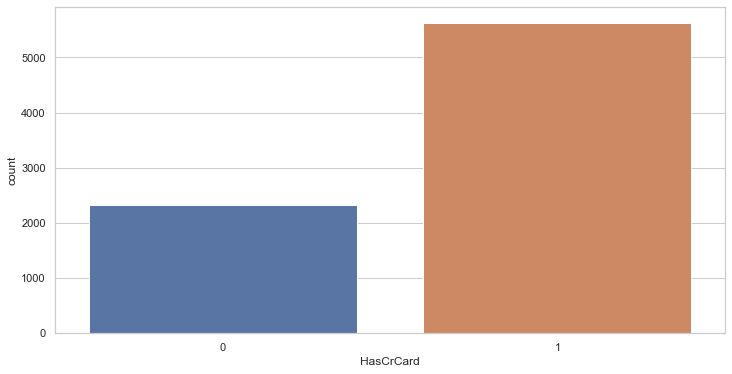

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='HasCrCard',data=data2)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

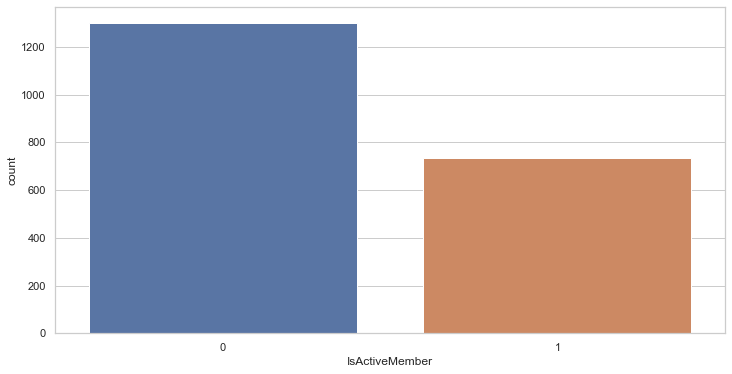

In [52]:
#HasCrCard	IsActiveMember
plt.figure(figsize=(12,6))
sns.countplot(x='IsActiveMember',data=data1)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

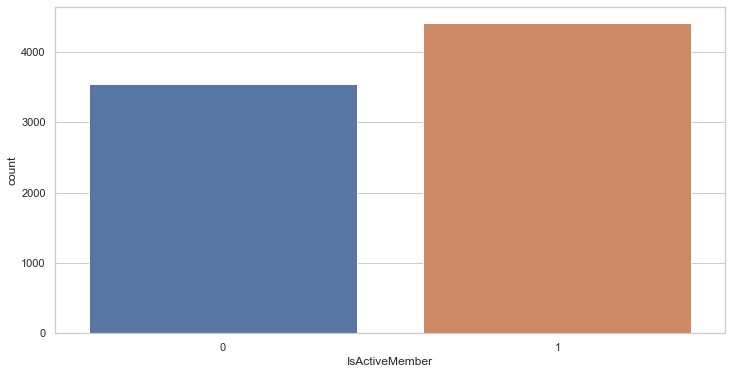

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='IsActiveMember',data=data2)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

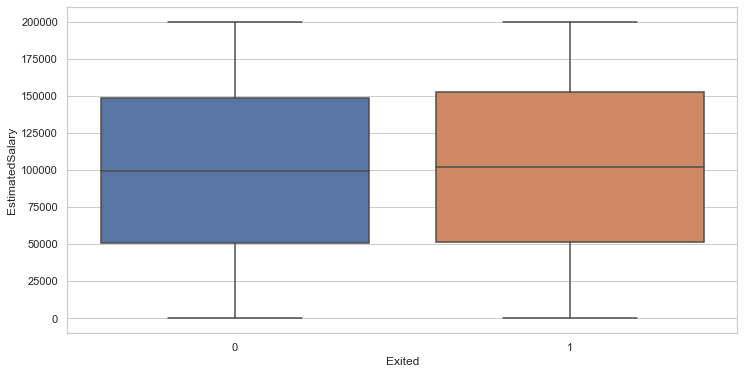

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Exited', y='EstimatedSalary',data=data)

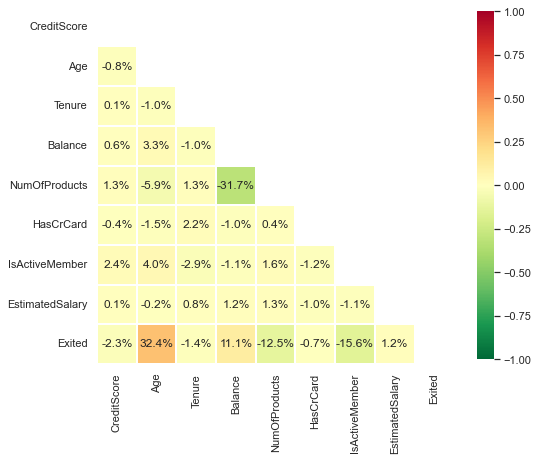

In [57]:
spearman = data.corr(method='spearman')
shape = np.triu(spearman)

fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(spearman, mask=shape, annot=True, fmt='.1%', cmap='RdYlGn_r', cbar_kws={'shrink': 0.8}, 
                 vmin=-1, center=0, vmax=1, square=True, linewidths=0.1, linecolor='white')
plt.show()

##### Conclution
Dari hasil visualisasi diatas, kita juga bisa melihat korelasi antar variabel numerik menggunakan headmap correlation.
dari hasil korelasi diatas kita bisa melihat bahwa Age memiliki korelasi positif paling tinggi dibanding variabel lain terhadap variavel Exited yaitu 32.4%.setelah itu variabel IsActivemember memiliki korelasi negatif 15.6% terhadap variabel exited, lalu disusul variabel NumOfProducts dengan korelasi negatif 12.5%, dan Balance dengan korelasi positif 11.1%. Sisanya memiliki korelasi rendah yaitu di bawah 10%